In [1]:
# Data utilities
import pandas as pd
import numpy as np

# Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# Set plotting font sizes and properties
TINY_SIZE = 12
SMALL_SIZE = 14
MEDIUM_SIZE = 18
BIGGER_SIZE = 20
MARKER_SIZE = 6
LINE_SIZE = 4

plt.rc("font", size=SMALL_SIZE)  # controls default text sizes
plt.rc("axes", titlesize=BIGGER_SIZE)  # fontsize of the axes title
plt.rc("axes", labelsize=MEDIUM_SIZE)  # fontsize of the x and y labels
plt.rc("xtick", labelsize=SMALL_SIZE)  # fontsize of the tick labels
plt.rc("ytick", labelsize=SMALL_SIZE)  # fontsize of the tick labels
plt.rc("legend", fontsize=TINY_SIZE)  # legend fontsize
plt.rc("figure", titlesize=BIGGER_SIZE)  # fontsize of the figure title
plt.rc("lines", markersize=MARKER_SIZE)  # marker size
plt.rc("lines", linewidth=LINE_SIZE)  # line width

mpl.rcParams["figure.dpi"] = 180

# Height and width per row and column of subplots
FIG_HEIGHT = 20
FIG_WIDTH = 18

fig_fcn = lambda kwargs: plt.figure(figsize=(FIG_WIDTH, FIG_HEIGHT), **kwargs)
color_list = sns.color_palette("colorblind")


In [56]:
import numpy as np
from sklearn.decomposition import PCA

# Load data
filename = "../../../../data/tbi_pecarn/raw/TBI PUD 10-08-2013.csv"
# data = pd.read_csv(filename)

# See how many Nans / Dropping some columns that contains a lot of Nans
data.apply(lambda x: np.count_nonzero(np.isnan(x)), axis = 0).sort_values()
data1 = data.drop(['Race', 'Observed', 'Ethnicity', 'Dizzy'], axis = 1).dropna()

data2 = data1.iloc[:,1:94]
data2_age = data2[['AgeInMonth', 'AgeinYears']]
data2_noage = data2.drop(['AgeInMonth', 'AgeinYears'], axis = 1)   # Categorical Outcomes

# One-hot encoding
data3 = pd.get_dummies(data2_noage, columns = list(data2_noage.columns))
data4 = pd.concat([data3, data2_age], axis=1)

# data4 is one-hot encoded pandas data.frame


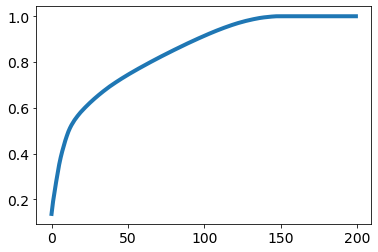

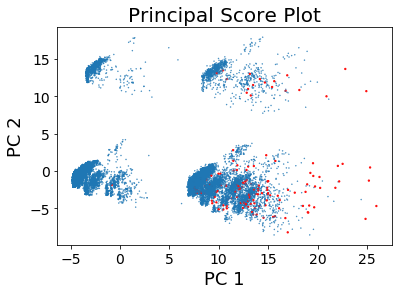

In [64]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

data4_scaled = StandardScaler().fit_transform(data4)

# Conducting PCA 
# pca = PCA().fit(data4_scaled) 
explained_variance = np.copy(pca.explained_variance_ratio_)
explained_variance_sum = explained_variance

# Variance explained
for i in range(1, len(explained_variance_sum)) :
    explained_variance_sum[i] += explained_variance_sum[i-1] 

# Scree Plot
plt.plot(explained_variance_sum[0:200])

# PC Scores
pc_score = pca.transform(data4_scaled)


# Outcome of each patients (to color, size the scatter plot below)
posint_col = np.where(data1['PosIntFinal'] == 1, '#ff0f0e', '#1f77b4')
posint_sz = np.where(data1['PosIntFinal'] == 1, 7, 0.7)


# PC PLOT (RED DOTS : PosIntFinal == 1)  
# Total : 28223 / PosIntFinal == 1 : 160
plt.figure()
plt.title("Principal Score Plot")
plt.xlabel("PC 1")
plt.ylabel("PC 2")
plt.scatter(pc_score[:,0], pc_score[:,1], c = posint_col, s = posint_sz, alpha = 1, marker = '.')


In [89]:
# Lastly, let's see what contributes to PC1, PC2 the most
print(data4.columns[np.where(pca.components_[0,:] > 0.1, True, False)])
print(data4.columns[np.where(pca.components_[1,:] > 0.1, True, False)])

pca.components_[0,np.where(pca.components_[0,:] > 0.1, True, False)]

Index(['CTForm1_1.0', 'IndAge_0', 'IndAmnesia_0', 'IndAMS_0', 'IndClinSFx_0',
       'IndHA_0', 'IndHema_0', 'IndLOC_0', 'IndMech_0', 'IndNeuroD_0',
       'IndRqstMD_0', 'IndRqstParent_0', 'IndRqstTrauma_0', 'IndSeiz_0',
       'IndVomit_0', 'IndXraySFx_0', 'IndOth_0', 'CTSed_0.0'],
      dtype='object')
Index(['OSI_1.0', 'OSIExtremity_0', 'OSIExtremity_1', 'OSICut_0',
       'OSICspine_0', 'OSIFlank_0', 'OSIAbdomen_0', 'OSIPelvis_0', 'OSIOth_0'],
      dtype='object')


array([0.15057353, 0.12452148, 0.13813809, 0.13361956, 0.1476472 ,
       0.13157274, 0.13290692, 0.12840983, 0.11138686, 0.14590267,
       0.1484723 , 0.14175019, 0.14775844, 0.14709257, 0.12671023,
       0.15033052, 0.13364457, 0.14486041])

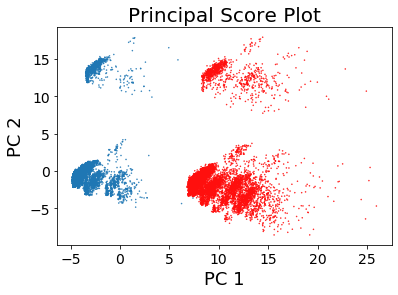

In [92]:
# CTForm1 (CT was ordered or not) contributes the most to PC1 

# How many of them were YES (CT was ordered)
sum(data1['CTForm1'] == 1)  # 8031 / 28223

# Indicating CTForm1 = Yes as red
ctform_col = np.where(data1['CTForm1'] == 1, '#ff0f0e', '#1f77b4')

plt.figure()
plt.title("Principal Score Plot")
plt.xlabel("PC 1")
plt.ylabel("PC 2")
plt.scatter(pc_score[:,0], pc_score[:,1], c = ctform_col, s = 1, alpha = 1, marker = '.')

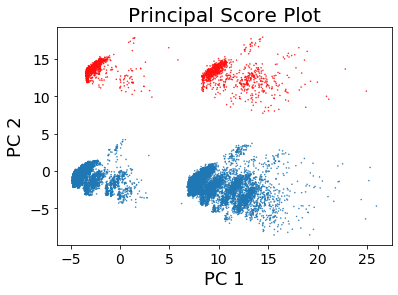

In [95]:
# OSI (oTHER ) contributes the most to PC2

# How many of them were YES 
sum(data1['OSI'] == 1)  # 2191 / 28223

# Indicating OSI = Yes as red
osi_col = np.where(data1['OSI'] == 1, '#ff0f0e', '#1f77b4')

plt.figure()
plt.title("Principal Score Plot")
plt.xlabel("PC 1")
plt.ylabel("PC 2")
plt.scatter(pc_score[:,0], pc_score[:,1], c = osi_col, s = 1, alpha = 1, marker = '.')

In [15]:
nrow = data.shape[0]
sum(data["CTDone"] == 1) / nrow  # 36.6% Patients CTDone

0.3663448466554529